In [14]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import measure, metrics
from skimage.metrics import structural_similarity as ssim
import numpy as np

In [15]:
def plot_images(images: list, titles: list, columns: int, font_size: int, allow_axes: bool) -> np.ndarray:

    """
    generates a plot of images for comparison, dynamic calculation of arrangement

    Parameters: 
        images (list): list of variables referencing an image
        titles (list): list of strings describing the image
        columns: (integer): number of columns for plot
        font_size (integer): fontsize of subplot titles
        allow_axes (boolean): if true, adds axes by default. else, removes axes

    Returns:
        matrix of pixel values for each image (np.array)
        a plot (image)
    """
    images_len = len(images)
    rows = images_len // columns

    fig, axes = plt.subplots(rows, columns, figsize = (18, 6 * rows))
    axes = axes.flatten()
    
    for i in range(images_len):
        axes[i].imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB),)
        axes[i].imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB),)
        axes[i].set_title(titles[i], fontsize=font_size)
        print(np.array(images[i]))
        if allow_axes == True:
            pass
        else:
            axes[i].axis('off')
    plt.show()


In [16]:
def gaussian_filter(image: np.ndarray, kernel_size: tuple) -> np.ndarray:

    '''
    generates an denoised image using a mean filter kernel

    Parameters:
        image (np.ndarray): a variable that references an image in np.ndarray encoding
        kernel_size (tuple): a tuple that indicates kernel size (shape)
    
    Returns:
        image(np.ndarray) 
    '''
    
    gaussian_kernel = np.ones(kernel_size, np.float32)/np.prod(kernel_size)
    conv_gaussian = cv.filter2D(image, -1, gaussian_kernel, borderType = cv.BORDER_CONSTANT)
    return conv_gaussian

In [17]:
def mean_filter(image: np.ndarray, kernel_size: tuple) -> np.ndarray:

    '''
    generates an denoised image using a mean filter kernel

    Parameters:
        image (np.ndarray): a variable that references an image in np.ndarray encoding
        kernel_size (tuple): a tuple that indicates kernel size (shape)
    
    Returns:
        image(np.ndarray) 
    '''
    
    mean_kernel = np.ones(kernel_size, np.float32)/np.prod(kernel_size)
    conv_mean = cv.filter2D(image, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
    return conv_mean

In [18]:
def translate_image(image: np.ndarray):
    translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]]) # Translate by (100, 100)
    translated_image = cv.warpAffine(image, translation_matrix, (image.shape[1],image.shape[0]))
    return translated_image

In [19]:
img1 = cv.imread('gu.jpg', 0)
img2 = cv.imread('me.jpg', 0)
img3 = cv.imread('tr.jpg', 0)

gau = gaussian_filter(img1, (3,3))
mea = mean_filter(img2, (3,3))
tra = translate_image(img3)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


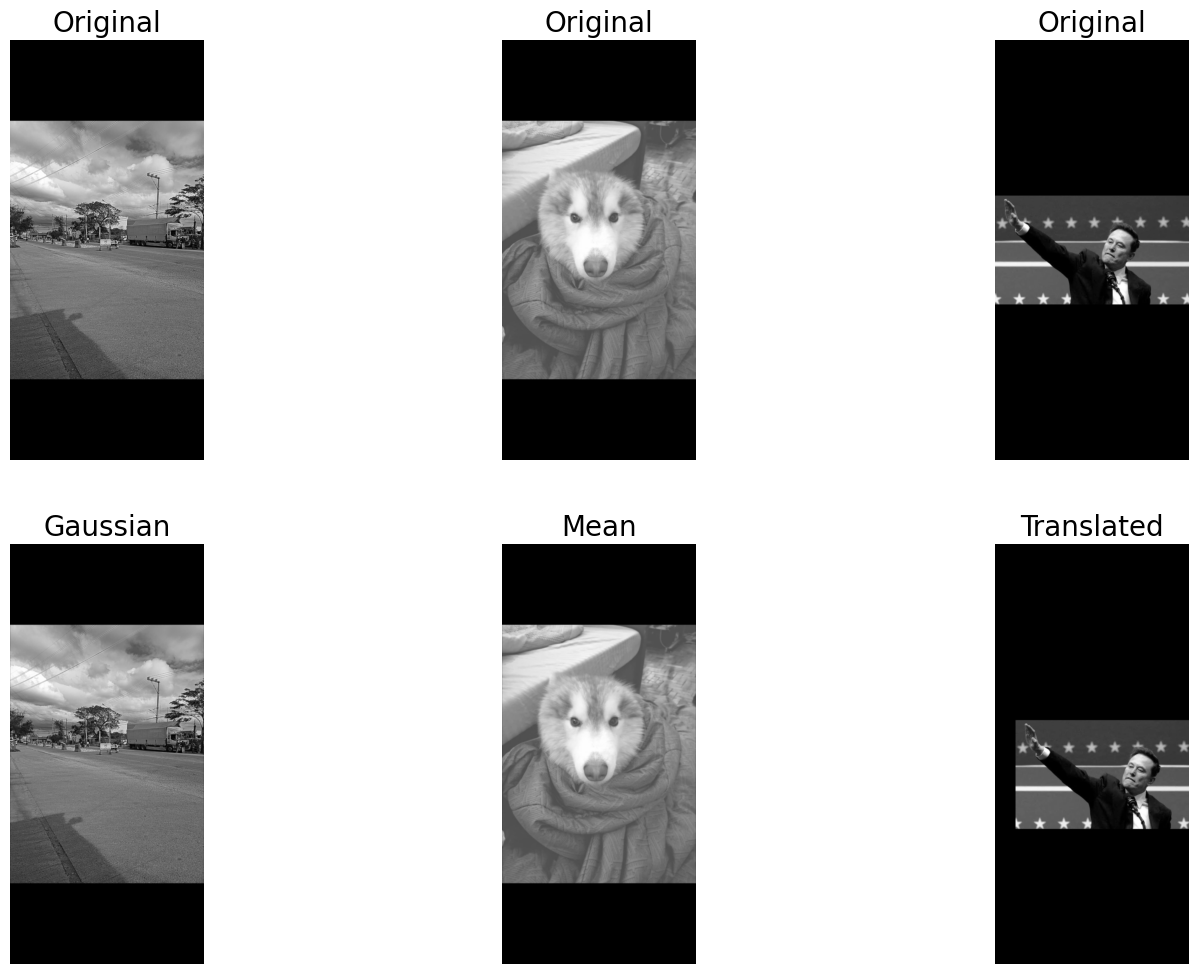

In [20]:
images = [img1, img2, img3, gau, mea, tra]
names = ['Original','Original','Original','Gaussian','Mean','Translated']
plot_images(images, names, 3, 20, False)